In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits,load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
mnist = pd.read_csv('mnist-in-csv/mnist_train.csv')
# for test in testing_set:
#     if sklearn_knn.predict(test) == your_knn(test, features, labels, k = 1):
#         print "Error in " + str(test)

In [19]:
mnist_data = np.array(mnist[mnist.columns[1:]])

In [31]:
mnist_labels = np.array(mnist[mnist.columns[0]])
mnist_data.shape

(60000, 784)

In [386]:
X_train, X_test, y_train, y_test = train_test_split(mnist_data[:10000], mnist_labels[:10000], test_size=0.3)
X_train = X_train/255
X_test = X_test/255
sklearn_knn = KNeighborsClassifier(n_neighbors=2)
sklearn_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [265]:
sklearn_knn.predict(X_test[65].reshape(1,-1))

array([3])

In [117]:
accuracy_score(y_true=y_test, y_pred=sklearn_knn.predict(X_test))

0.9

In [150]:
# plt.imshow(digits['data'][1].reshape(8,8))

In [325]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [205]:
X_train[0].shape

(64,)

In [153]:
class LSH:
    def __init__(self,num_rand_vec,data_dim):
        self.num_rand_vec = num_rand_vec
        self.dim = data_dim
        self.hash_table = {}
    
    def gen_random_vectors(self):
        rand_vec_matrix = np.random.randn(self.num_rand_vec,self.dim)
        return rand_vec_matrix
    
    def make_hash_key(self,inp):
        return ''.join(inp)
    
    def fit(self,data):
        assert data.shape[1] == self.dim, 'dimension of input data and dimension in LSH object does not match'
        rand_vecs = self.gen_random_vectors()
        bools = (np.dot(data, rand_vecs.T) > 0).astype('int')
        keys = list(map(self.make_hash_key , (np.dot(data, rand_vecs.T) > 0).astype('int').astype('str')))
        unique_keys = set(keys)
        for key in unique_keys:
            self.hash_table[key] = []
        for idx,k in enumerate(keys):
            self.hash_table[k].append(idx)
        return 'success'
    
    def hash_table(self):
        return self.hash_table
        
    def hash_table_dist(self):
        summary_hash_table = {}
        for k,v in self.hash_table.items():
            summary_hash_table[k] = len(v)
        return summary_hash_table   
    

In [169]:
lsh = LSH(num_rand_vec=4,data_dim=64)

In [206]:
lsh.fit(X_train)

'success'

In [207]:
lsh.hash_table_dist()

{'1000': 976,
 '0010': 1,
 '1011': 190,
 '1001': 27,
 '0000': 18,
 '0110': 1,
 '0100': 5,
 '1010': 37,
 '1100': 158,
 '1111': 1,
 '1110': 2,
 '0101': 3,
 '1101': 23,
 '0001': 7}

In [165]:
lsh.hash_table['00'].

SyntaxError: invalid syntax (<ipython-input-165-a60e19a887c0>, line 1)

In [425]:
### incorporating multiple tables
class LSH_:
    def __init__(self,hash_size,data_dim,num_tables):
        self.num_rand_vec = hash_size  # number of buckets will be 2**hash_size eg: 2**2=4 (00,01,10,11)
        self.dim = data_dim
        self.num_tables = num_tables
        self.hash_tables = [{} for _ in range(self.num_tables)]
        self.seeds = [i for i in range(self.num_tables)]
        self.random_vectors = []
        for seed in self.seeds:
            np.random.seed(seed)
            self.random_vectors.append(self.gen_random_vectors())
    
    def gen_random_vectors(self):
        rand_vec_matrix = np.random.randn(self.num_rand_vec,self.dim)
        return rand_vec_matrix
    
    def make_hash_key(self,inp):
        return ''.join(inp)
    
    def fit(self,data):
        assert data.shape[1] == self.dim, 'dimension of input data is {} and dimension in LSH object is {}'.format(data.shape,self.dim)
        for rand_vec,hash_table in zip(self.random_vectors,self.hash_tables): #, seed in zip(self.hash_tables,self.seeds):
#             np.random.seed(seed)
#             rand_vecs = self.gen_random_vectors()
#             bools = (np.dot(data, rand_vec.T) > 0).astype('int')
            keys = list(map(self.make_hash_key , (np.dot(data, rand_vec.T) > 0).astype('int').astype('str')))
            unique_keys = set(keys)
            for key in unique_keys:
                hash_table[key] = []
            for idx,k in enumerate(keys):
                hash_table[k].append(idx)
        return 'success'
    
    def hash_table(self):
        return self.hash_tables
        
    def hash_table_dist(self):
        distribuitions = []
        for hash_table in self.hash_tables:
            summary_of_table = {}
            for k,v in hash_table.items():
                summary_of_table[k] = len(v)
            distribuitions.append(summary_of_table)
        return distribuitions   
    
    def query(self,query_data):
        key_for_each_table = []
        for rand_vec in self.random_vectors:
            key = ''.join((np.dot(query_data, rand_vec.T) > 0).astype('int').astype('str'))
            key_for_each_table.append(key) #each point will be assigned to exactly on bucket in one hash table
        result = []
        assert len(key_for_each_table) == len(self.hash_tables), 'somethings wrong'
        for hash_table,key in zip(self.hash_tables,key_for_each_table):
            if key in hash_table.keys():
                result.extend(hash_table[key])
#         print(keys_for_each_table)
        return set(result)
            

In [431]:
lsh_= LSH_(hash_size=6,data_dim=784,num_tables=20)

In [432]:
lsh_.fit(X_train)

'success'

In [433]:
# lsh_.hash_table_dist()

In [434]:
query = X_test[8]
print('number of candidates:',len(lsh_.query(query)))
(lsh_.query(query))

number of candidates: 4531


{0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 26,
 27,
 28,
 31,
 32,
 33,
 34,
 35,
 37,
 39,
 43,
 44,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 56,
 57,
 59,
 60,
 61,
 63,
 64,
 65,
 67,
 69,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 81,
 85,
 87,
 88,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 98,
 101,
 103,
 104,
 106,
 108,
 110,
 112,
 114,
 115,
 117,
 118,
 119,
 121,
 123,
 124,
 125,
 126,
 130,
 132,
 133,
 134,
 136,
 138,
 139,
 141,
 145,
 146,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 163,
 164,
 169,
 170,
 171,
 173,
 176,
 178,
 181,
 182,
 183,
 184,
 185,
 188,
 190,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 201,
 202,
 204,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 214,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 226,
 227,
 228,
 230,
 232,
 233,
 234,
 235,
 236,
 238,
 239,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 251,
 252,
 253,
 255,
 257,
 258,
 263,
 264,
 265,
 267,
 269,
 270,
 271,
 27

In [343]:
def show_mnist_image(arr):
    plt.imshow(arr.reshape((28,28)))

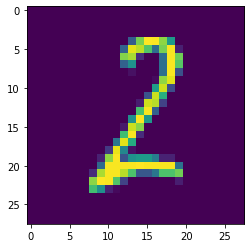

In [403]:
show_mnist_image(X_test[8])

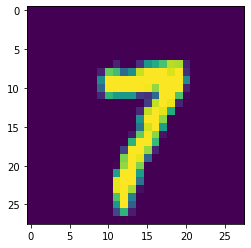

In [404]:
show_mnist_image(X_train[50])

In [345]:
from sklearn.metrics.pairwise import cosine_similarity

In [346]:
query_doc = X_test[10]
candidate_docs = list(lsh_.query(query_doc))

In [347]:
sims = cosine_similarity(mnist_data[[candidate_docs]],query_doc.reshape(1,-1))
sims

/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([[0.32066338],
       [0.50486579],
       [0.63605525],
       [0.32735386],
       [0.52684048],
       [0.73588427],
       [0.43459951],
       [0.35187836],
       [0.27821446],
       [0.25364051],
       [0.47165474],
       [0.5970946 ],
       [0.36529569],
       [0.56874971],
       [0.40432079],
       [0.46647276],
       [0.50988555],
       [0.43045733],
       [0.39188586],
       [0.56312693],
       [0.56996994],
       [0.34569989],
       [0.30738718],
       [0.46103208],
       [0.70623589],
       [0.33869284],
       [0.52698667],
       [0.45942099],
       [0.47796511],
       [0.26849696],
       [0.45065948],
       [0.59125339],
       [0.26204851],
       [0.39738599],
       [0.48654443],
       [0.61713905],
       [0.42070269],
       [0.30315282],
       [0.33586012],
       [0.51789034],
       [0.5964939 ],
       [0.55105162],
       [0.60070602],
       [0.23714908],
       [0.35030557],
       [0.43996352],
       [0.39621223],
       [0.295

In [348]:
max_sim_idx = sims.argmax()
max_sim_idx

141

In [349]:
doc = X_train[candidate_docs[max_sim_idx]]

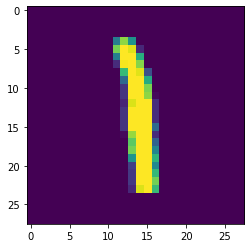

In [352]:
show_mnist_image(doc)

In [232]:
def lsh_prediction(test_doc):
    candidate_docs = list(lsh_.query(test_doc))
    sims = cosine_similarity(mnist_data[[candidate_docs]],test_doc.reshape(1,-1))
    max_sim_idx = sims.argmax()
    prediction = y_train[candidate_docs[max_sim_idx]]
    return prediction

In [330]:
acc = 0
predictions = []
for test_doc,label in zip(X_test[:50],y_test[:50]):
    predictions.append(lsh_prediction(test_doc))
    if label == lsh_prediction(test_doc):
        acc+=1
acc_ = acc/len(y_test)

/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensiona

/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensiona

/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensiona

/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensiona

In [333]:
lsh_prediction(X_test[10])

/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


9

In [331]:
acc_

0.008888888888888889